<a href="https://colab.research.google.com/github/Mark-Brennan/Example-Projects/blob/main/T51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning - PCA and clustering - 1973 US Crime stats by state

See accompanying document "T51 Mark Brennan US arrests data set analysis"

## Exploring the data

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_csv("/content/UsArrests.csv",index_col='City')  #load up the data and use the city column as the index column

#df.index.names = ['State'] # They are not cities - they are states !
#df=df.reset_index()
#df.head()




In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv',index_col=0)
df.index.names = ['State'] 

df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600


<Axes: xlabel='State', ylabel='Assault'>

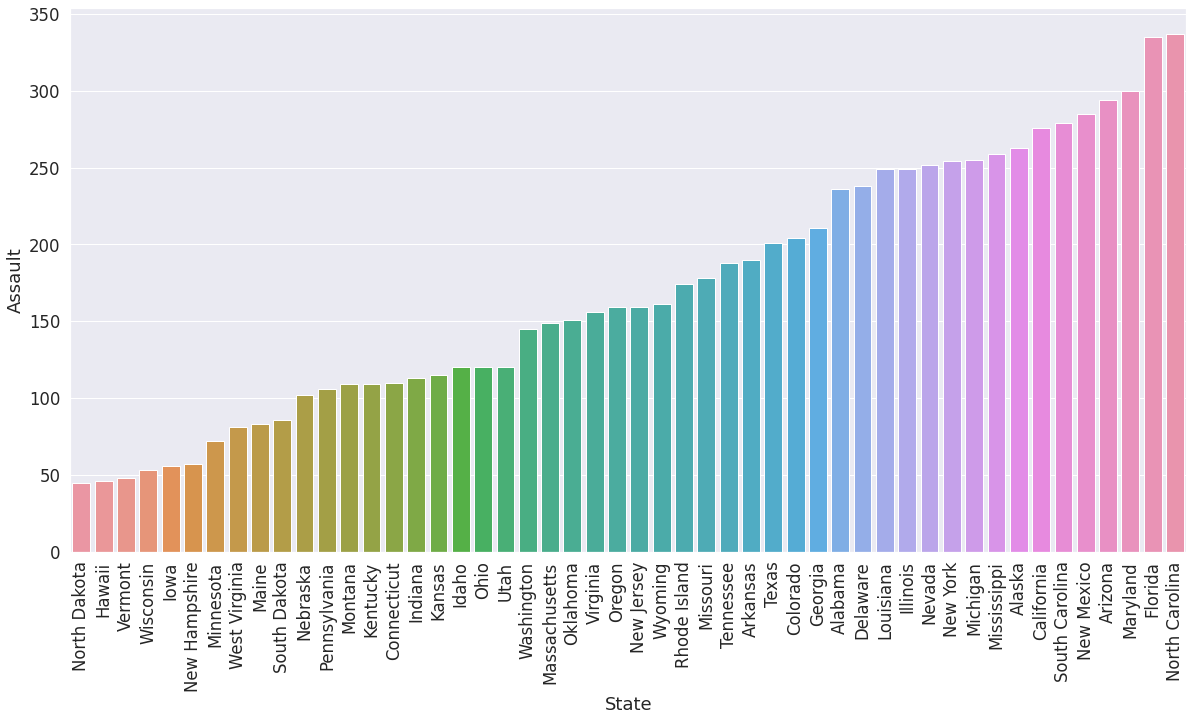

In [85]:
fig, ax = plt.subplots(figsize=(20,10)) # I've got a really big screen :)
plt.xticks(rotation=90)

sns.barplot(x=df.index, y=df.Assault, data=df,order=df.sort_values('Assault').index)

#Explanation of headings

##1973 US crime figures by city

* Murders, Assaults, Rapes per 100 000
* UrbanPop: Percentage population living in an urban area

The column names are relatively clear so keep them



In [86]:
print('Number of cases: {}, Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50, Number of features: 4




```
# This is formatted as code
```

Summarise the statistical properties of the columns:

In [87]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]]#.transpose() #select relevant rows
selected_stats

,Murder,Assault,UrbanPop,Rape
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
max,17.40,337.00,91.00,46.00


The table shows that are significant differences in in crime levels between individual states.

We also need to determine if we have any missing values, and which features these occur for:

In [88]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing


,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


#No missing data !

It is often useful to determine the type of each variable. We see that we are working predominantly with continuous variables:

In [89]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


##Using the Seaborn 'Pairplot' we can view review a plot of each variable against the other variables. In addition to this we can see the distribution of each variable##

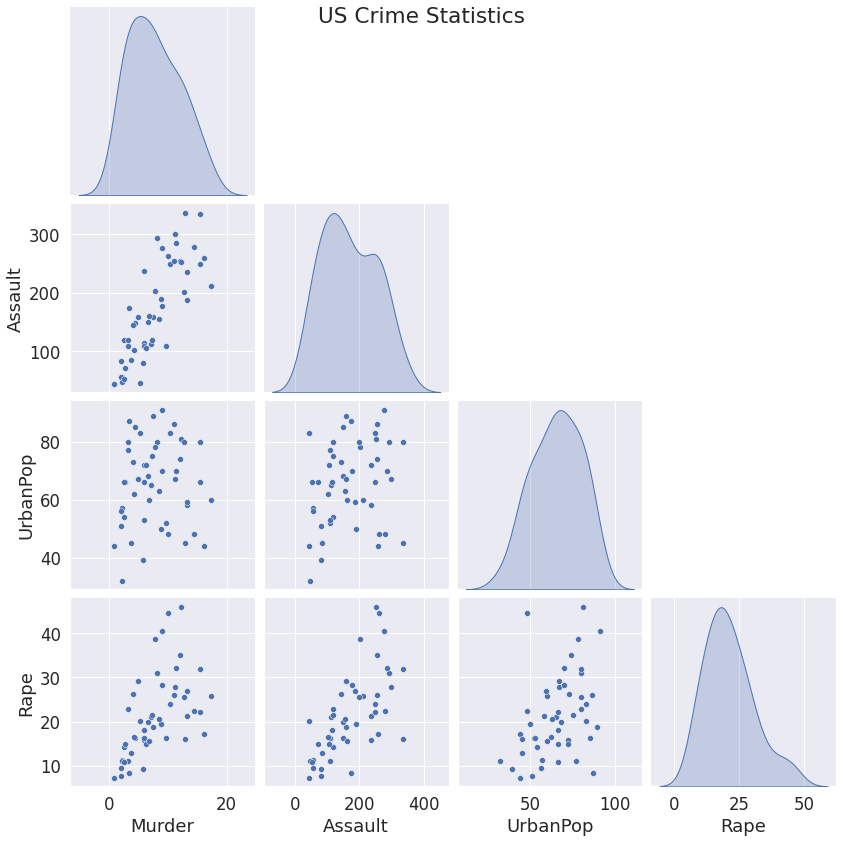

In [90]:
sns.set_style("whitegrid")
sns.set(font_scale=1.5)
sns.pairplot(df,height=3,diag_kind='kde',corner=True).fig.suptitle('US Crime Statistics');
plt.show()



##There would seem to be some relatively clear related variables. In particular the plot of assaults against murders. Plots of the crimes against the urban population are less clear. One would be tempted to think that high urban populations might lead to more crime. However  -if the population is relatively low anyway the use of percentages can be quite misleading.

##The histograms are relatively well spread out; suggesting we can use standardisation to scale the data##



The crime data here is per 100000 and so already scaled against itself. However - the population numbers are recorded as a percentage. Scaling the data will be useful to ensure everything is assessed proportionatly.

## Correlation Analysis

Let's use Seaborn to visualise the correlation data.

In [91]:
State = df.index
corr_df = df.corr()
labels =corr_df.columns

correlations = corr_df.corr()

<Axes: >

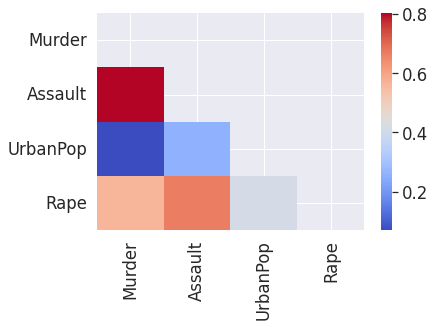

In [92]:
mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)   # `np.bool` is a deprecated alias for the builtin `bool` . Hiding the repeat of the 'repeats' of the plots
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")


In the plot, there is a linear correlation between strongly correlated variables: those coloured in either dark red or dark blue. Variables which are positively correlated are red: an increase in one corresponds to an increase in the other, while negatively correlated variables are blue: a decrease in one means an increase in the other.

From the correlation plot, it is evident that the number of murders is
 strongly correlated with the number of assaults. Conversley, the number of murders is strongly negatively correlated with the percentage of population living in urban areas. To a lesser extent, the number of rapes are correlated with the number of rapes and murders. 

These correlations suggest that crime is more likely in denser urban areas. Also, that assault can be seen as a gateway crime that leads to more violent crimes.



Standardise the data 

In [93]:
from sklearn.preprocessing import StandardScaler

# select and standardize features. That is taking away the mean and dividing by the sample standard deviation
df.index_col='State'
X = StandardScaler().fit_transform(df.values) # scale the data


## PCA

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction techinque which is useful when we have a lot of variables, and need to reduce these. 



In [94]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

#X = df.values.squeeze()

pca = PCA(n_components=4)

X_trans = pca.fit_transform(X)  # perform PCA analysis on the standardised values from above

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,0.99,1.13,-0.44,0.16
1,1.95,1.07,2.04,-0.44
2,1.76,-0.75,0.05,-0.83
3,-0.14,1.12,0.11,-0.18
4,2.52,-1.54,0.60,-0.34


In [95]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [1.59 1.   0.6  0.42]


Text(0.5, 1.0, 'Cumulative Explained Variance')

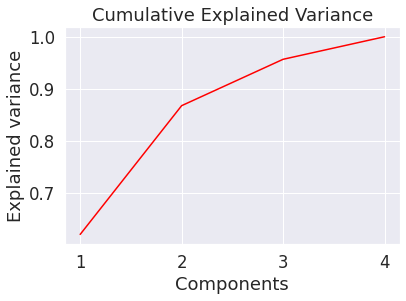

In [96]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

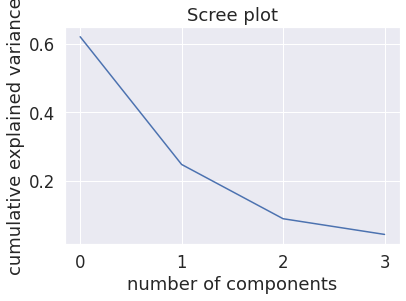

In [97]:
# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

In [98]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [0.62 0.25 0.09 0.04]


In [99]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [2.53 3.54 3.9  4.08]


In [100]:
state=df.index

In [101]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(15, 15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = state[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

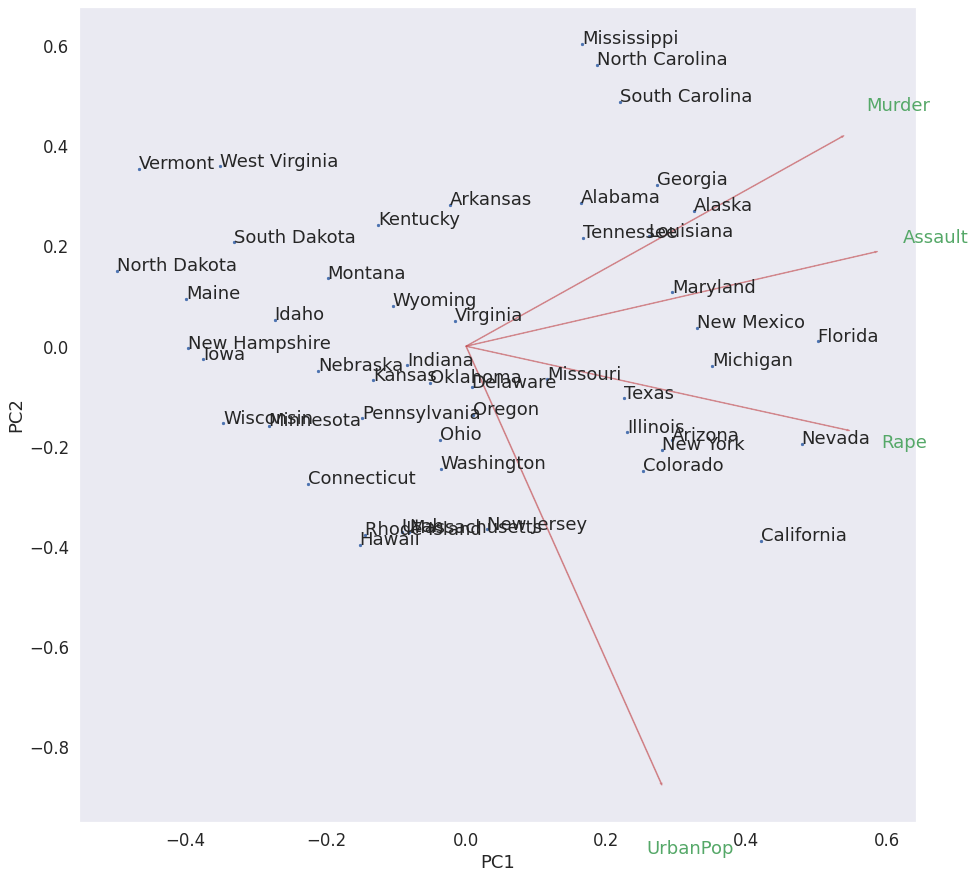

In [102]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels))
plt.show()

##The plot shows that PCA1 is more dominated by the crime variables. The angles between the lines for murder, assault and rape are relatively small and we can deduce that they are closely related. Percentage urban population has a greater influence over PCA 2. 

##States such as Florida, Nevada and New Mexico seem to lie in a similar cluster with high crime rates. On the opposite end of the scale we can see a group with much lower crime rates including North Dakota, Maine and New Hampshire.



In [103]:
pca.components_[0:4]

array([[ 0.54,  0.58,  0.28,  0.54],
       [ 0.42,  0.19, -0.87, -0.17],
       [-0.34, -0.27, -0.38,  0.82],
       [ 0.65, -0.74,  0.13,  0.09]])

In [104]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


**Greater than 80% of the variance is explained by 2 components suggesting that we can drop one of the variables

In [105]:
pca_df = pd.DataFrame(X_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
State,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


## Hierarchical clustering


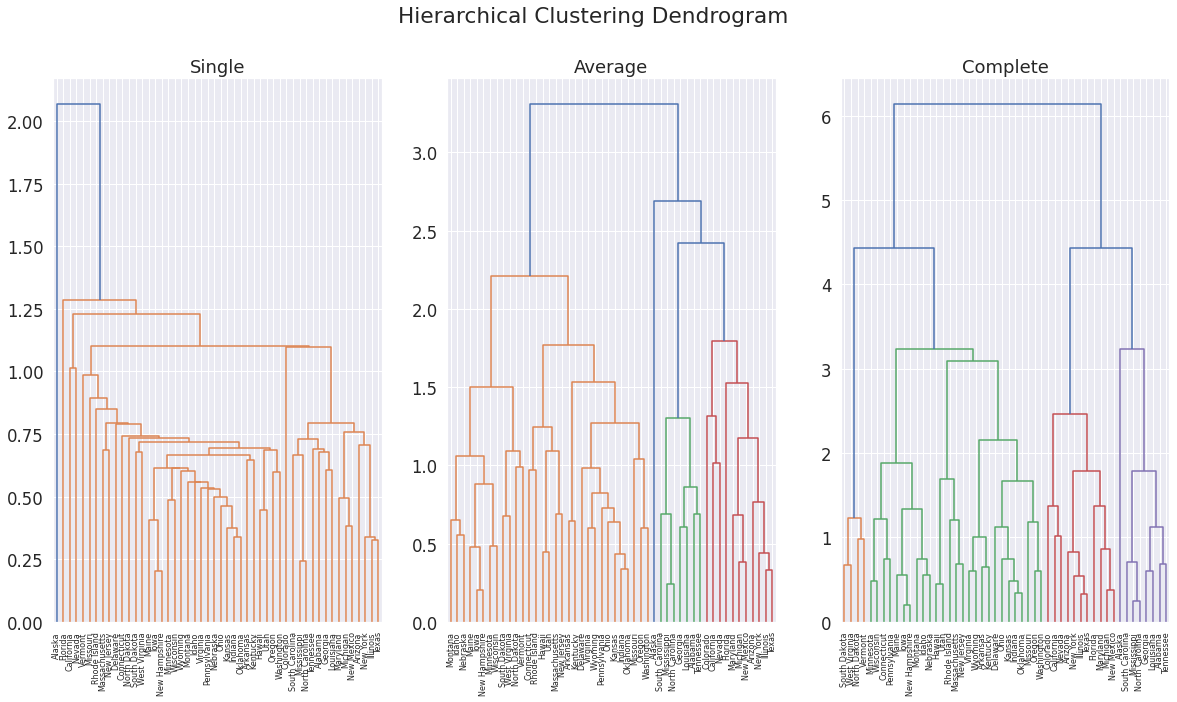

In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

Single linkage: computes the minimum distance between clusters before merging them. Complete linkage: computes the maximum distance between clusters before merging them. Average linkage: computes the average distance between clusters before merging them.
The advantage of Hierarchical Clustering is not necessary to define the number of clusters. The dendograms make it easier to understand and compare the methods for calculating the clusters. Hierarchical clustering does not work very well on vast amounts of data or huge datasets - not an issue in this case.
Here the use of complete linkage seems to give the most balanced group of cluster so let’s look at this in more detail.


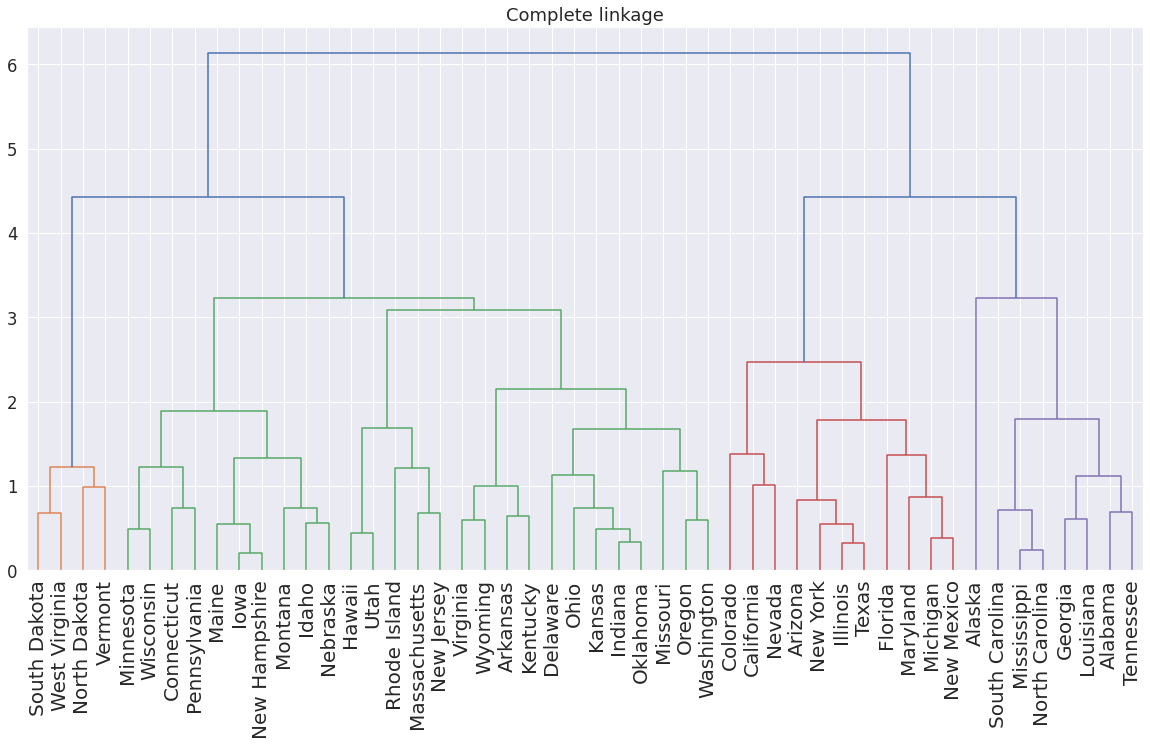

In [107]:
fig, ax = plt.subplots(figsize=(20,10)) # I've got a really big screen :)

plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index,ax=ax,leaf_font_size=20 )
plt.show()

In [108]:
# Fit the Agglomerative Clustering
 
model = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage ='complete')

In [109]:
# Fit and predict to have the cluster labels.
y_pred =model.fit_predict(pca_df)
y_pred

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0])

In [110]:
# Fetch the cluster labels
df['cluster labels']= y_pred
# Let's see which State falls in which cluster
df[['cluster labels']]

,cluster labels
State,
Alabama,1
Alaska,1
Arizona,2
Arkansas,0
California,2
Colorado,2
Connecticut,0
Delaware,0
Florida,2


<Axes: xlabel='cluster labels', ylabel='Rape'>

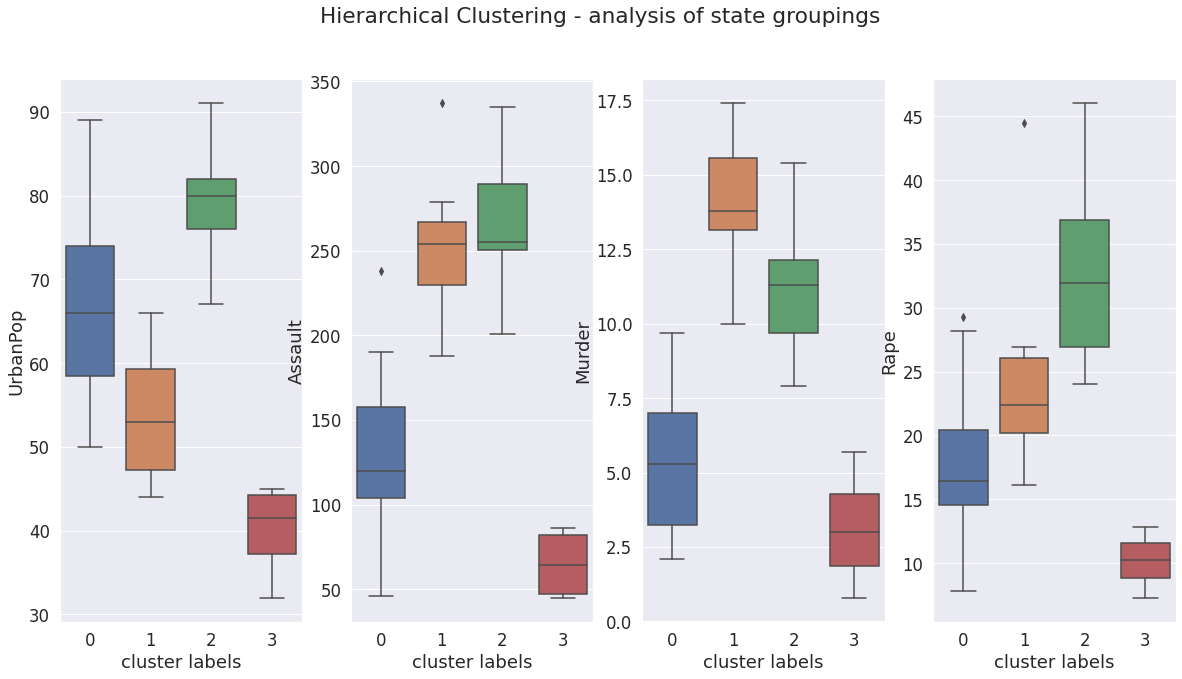

In [111]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
fig.suptitle('Hierarchical Clustering - analysis of state groupings')
#plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='UrbanPop', data=df,ax=ax1)
sns.boxplot(x='cluster labels', y='Assault', data=df,ax=ax2)
sns.boxplot(x='cluster labels', y='Murder', data=df,ax=ax3)
sns.boxplot(x='cluster labels', y='Rape', data=df,ax=ax4)

In [112]:
state_groups=df['cluster labels'].reset_index()
group0_states=state_groups.loc[state_groups['cluster labels']==0]
group0_states=group0_states['State'].values
group1_states=state_groups.loc[state_groups['cluster labels']==1]
group1_states=group1_states['State'].values
group2_states=state_groups.loc[state_groups['cluster labels']==2]
group2_states=group2_states['State'].values
group3_states=state_groups.loc[state_groups['cluster labels']==3]
group3_states=group3_states['State'].values

In [113]:
print(f"GROUP 0 states have relatively high percentage urban populations but relatively low crime levels: \n\n{group0_states} \n")
print(f"GROUP 1 states have the highest percentage urban populations and high crime levels: \n{group1_states} \n")
print(f"GROUP 2 states have relatively low percentage urban populations but high crime levels:\n {group2_states} \n")
print(f"GROUP 3 states have the lowest percentage urban populations and the lowest crime levels:\n {group3_states} \n")



GROUP 0 states have relatively high percentage urban populations but relatively low crime levels: 

['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Missouri'
 'Montana' 'Nebraska' 'New Hampshire' 'New Jersey' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'Utah' 'Virginia' 'Washington'
 'Wisconsin' 'Wyoming'] 

GROUP 1 states have the highest percentage urban populations and high crime levels: 
['Alabama' 'Alaska' 'Georgia' 'Louisiana' 'Mississippi' 'North Carolina'
 'South Carolina' 'Tennessee'] 

GROUP 2 states have relatively low percentage urban populations but high crime levels:
 ['Arizona' 'California' 'Colorado' 'Florida' 'Illinois' 'Maryland'
 'Michigan' 'Nevada' 'New Mexico' 'New York' 'Texas'] 

GROUP 3 states have the lowest percentage urban populations and the lowest crime levels:
 ['North Dakota' 'South Dakota' 'Vermont' 'West Virginia'] 



### K-means clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 4. A visualisation of the clusters is shown in the figure below.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


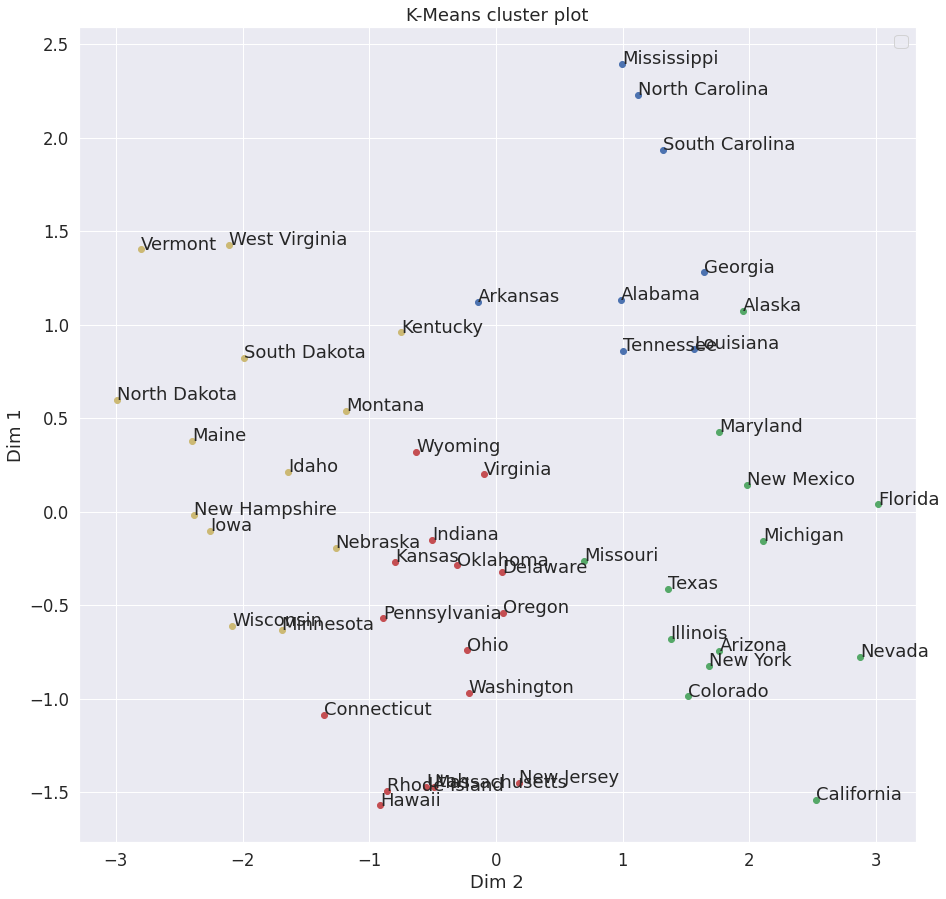

In [114]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_trans[:,0]
y = X_trans[:,1]

# Fit k-means
k=4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots(figsize=(15,15))
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = state[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [115]:
cluster_labels

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [116]:
cent

array([[-0.47, -0.74, -0.16],
       [ 1.06,  1.48, -0.4 ],
       [ 1.89, -0.36,  0.26],
       [-1.96,  0.37,  0.19]])

In [117]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster labels
State,,,,,
Alabama,13.200,236,58,21.200,1
Alaska,10.000,263,48,44.500,1
Arizona,8.100,294,80,31.000,2
Arkansas,8.800,190,50,19.500,0
California,9.000,276,91,40.600,2


In [118]:
# Fetch the cluster labels
df['cluster labels']= cluster_labels
# Let's see which State falls in which cluster
df[['cluster labels']]

,cluster labels
State,
Alabama,1
Alaska,2
Arizona,2
Arkansas,1
California,2
Colorado,2
Connecticut,0
Delaware,0
Florida,2


<Axes: xlabel='cluster labels', ylabel='Rape'>

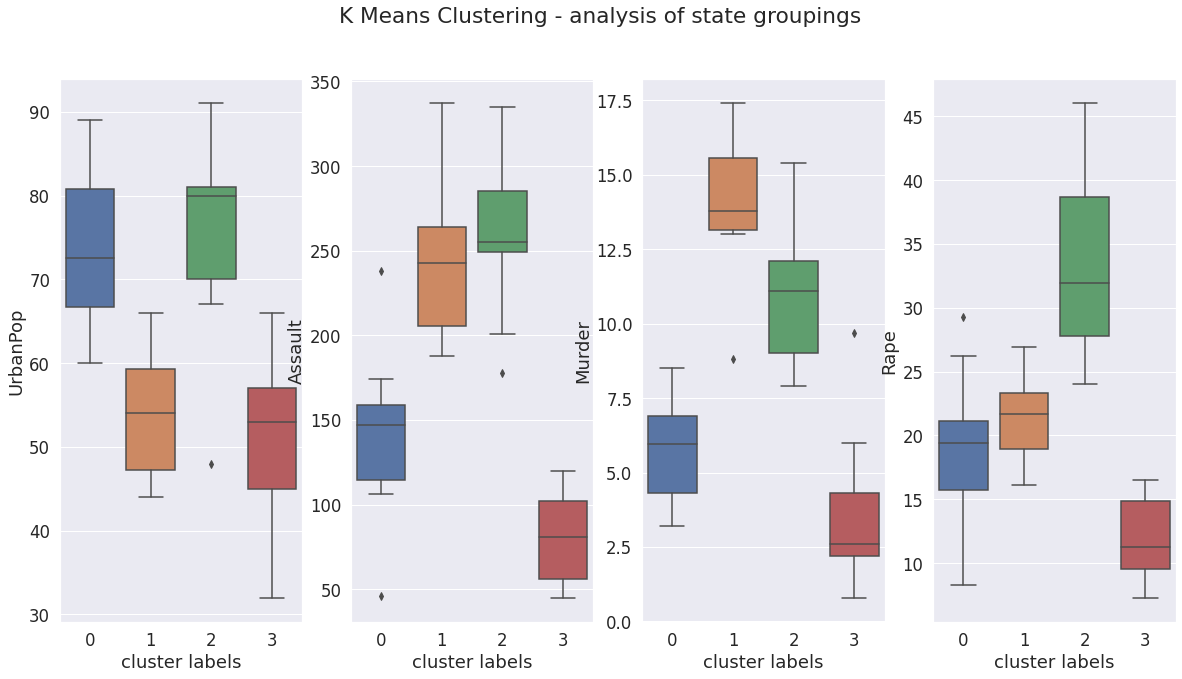

In [119]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
fig.suptitle('K Means Clustering - analysis of state groupings')

#plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='UrbanPop', data=df,ax=ax1)
sns.boxplot(x='cluster labels', y='Assault', data=df,ax=ax2)
sns.boxplot(x='cluster labels', y='Murder', data=df,ax=ax3)
sns.boxplot(x='cluster labels', y='Rape', data=df,ax=ax4)


##Comparison of the box plot analysis of the state groups created by the two clustering techniques.Interestingly, when the plots of the crime statistics are compared they show a very similar distribution. The plots of urban population though are a lot less similar - the hierarchical clustering technique having produced four distinct groups. The K means clustering is indicating that lower percent populations means lower crime figures which is potentially misleading. A fuller investigation of such serious crime is likely to require analysis of many variables.
